# `datexplore` Example Usage
Here we will show how the datexplore package can be used for the early stages of a data analysis project. We will show example usages for each function in the package (`clean_names`, `visualise`, and `detect_outliers`). 

The early stages of data analysis projects often begin with similar steps. For many projects, data cleaning and exploratory data analysis are essential before beginning more complex analysis. Using clean data for your analysis can make your code less suceptible to bugs or errors. Additionally, performing exploratory data analysis can help to direct the analysis of your project and gives a stronger understanding of the data you are working with. 

This package aims to help with the early stages of a project. Specifically, it contains a function to clean the column names of tabular data, a function to detect outliers in numerical data, and a function to create useful visulaization for exploratory data analysis. 

## Imports

In [32]:
from datexplore.datexplore import clean_names
from datexplore.datexplore import visualise
from datexplore.datexplore import detect_outliers
import pandas as pd
import numpy as np

## Clean names

Often times raw data contains non syntactic column names. It can be particulary troublesome when the column names contain spaces and you are working with other packages which are designed only for column names without spaces.

#### For column name with a space:
An example of one such tool which does not work for column names with spaces the .query() method from the pandas library. This is shown below:

In [33]:
raw_df = pd.DataFrame({'Even Numbers': [2, 4, 6, 8],'odd numbers': [1, 3, 5, 7]})
filtered_df = raw_df.query("Even Numbers > 2")

SyntaxError: invalid syntax (<unknown>, line 1)

As you can see, using the column name containing a space results in an error. 
Now, we can use the clean_names function to "clean" the column names of the data frame. By "cleaning" the column names, we mean that we  make all column names in a dataframe such that the names only use letters, numbers, and underscores.

The clean_names function takes a pandas dataframe containing data with column names as an input. There is also an optional parameter, case, which specifies the capitalization structure of the output dataframe (more on this later). 

#### For column names without spaces:
Below we use the clean_names function and show that the resulting dataframe can now be used with the .query() method.

In [34]:
# Clean the column names and view the resulting dataframe
df = pd.DataFrame({'Even Numbers': [2, 4, 6, 8],'odd numbers': [1, 3, 5, 7]})
clean_names(df)
df

even_numbers  odd_numbers
0             2            1
1             4            3
2             6            5
3             8            7

In [35]:
# Use the .query method on the new dataframe
filtered_df = df.query("even_numbers > 2")
filtered_df

even_numbers  odd_numbers
1             4            3
2             6            5
3             8            7

This may not seem that useful for a dataframe with only two columns, but for a data frame with many columns, or if you are working with many dataframes, using the clean_names function could save a lot of time. 

#### Exploring the case parameter: 
The clean_names function also has an optional parameter, case, which specifics the capitalization structure of the output column names. The default value for this parameter is "snake_case" and the other options are "CamelCase" and "lowerCamelCase". snake_case uses only lowercase letters and spaces are replaced with underscores. "CamelCase" capitalizes the first letter of a name and every letter following a space. "lowerCamelCase" results in the first letter of the name being lowercase and the first letter following a space being capitalized. 
Below are some examples using this optional parameter:  

In [36]:
df1 =  pd.DataFrame({'make this SnaKe CaSe##': ["sample 1", "sample 2", "sample 3", "sample 4"]})
display(df1)
clean_names(df1) #this has the default value for the case parameter which is snake_case

make this SnaKe CaSe##
0               sample 1
1               sample 2
2               sample 3
3               sample 4

make_this_snake_case
0             sample 1
1             sample 2
2             sample 3
3             sample 4

In [37]:
df2 =  pd.DataFrame({'make THIS CAMEL Case!!!': ["sample 1", "sample 2", "sample 3", "sample 4"]})
display (df2)
clean_names(df2, case = "CamelCase") 

make THIS CAMEL Case!!!
0                sample 1
1                sample 2
2                sample 3
3                sample 4

MakeThisCamelCase!!!
0             sample 1
1             sample 2
2             sample 3
3             sample 4

In [38]:
df3 =  pd.DataFrame({'Make this ***LOWER*** CAMEL caSe': ["sample 1", "sample 2", "sample 3", "sample 4"]})
display(df3)
clean_names(df3, case = "lowerCamelCase")

Make this ***LOWER*** CAMEL caSe
0                         sample 1
1                         sample 2
2                         sample 3
3                         sample 4

makeThisLowerCamelCase
0               sample 1
1               sample 2
2               sample 3
3               sample 4

## Visualise

The `datexplore` package, within the Python ecosystem, complements the functionalities of pandas, seaborn, and matplotlib by offering a unified approach to visualizing data. The `visualise` function simplifies the process of creating comprehensive visual analyses, especially during the early stages of a data project.

The visualise function aims to provide a thorough visual exploration of a DataFrame. It focuses on three key areas:

**Identifying Missing Values:** Generates heatmap to visualize missing values in the DataFrame. This is crucial for assessing data quality and deciding on data cleaning strategies.

**Correlation Analysis:** Computes and displays a correlation heatmap for numeric variables. Understanding these relationships is vital for feature selection and predictive modeling.

**Pairwise Variable Inspection:** Create a grid of scatter plots for numeric variables. This helps in visually inspecting variable distributions and interactions.

#### Usage Example

In [46]:
data = {
    'Numeric_1': np.random.randint(1, 100, 10),
    'Numeric_2': np.random.normal(50, 15, 10),
    'Numeric_3': np.random.uniform(20, 60, 10),
    'Category': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']
}
df = pd.DataFrame(data)

df.loc[1:4, 'Numeric_1'] = np.nan
df.loc[4:6, 'Numeric_2'] = np.nan
df.loc[7:8, 'Numeric_3'] = np.nan

df

Numeric_1  Numeric_2  Numeric_3 Category
0       60.0  55.772101  41.886092        A
1        NaN  66.599678  41.797397        B
2        NaN  42.284315  48.683661        C
3        NaN  62.653329  46.797470        D
4        NaN        NaN  49.999846        E
5       80.0        NaN  24.569233        F
6       86.0        NaN  57.739063        G
7       99.0  64.628283        NaN        H
8       11.0  56.293119        NaN        I
9       18.0  35.333900  57.475740        J

The created toy DataFrame has four columns, where three are numeric and one is categorical. It also includes deliberately introduced missing values to demonstrate the capabilities of the `visualise` function. 

Now, let's run the `visualise` function. 

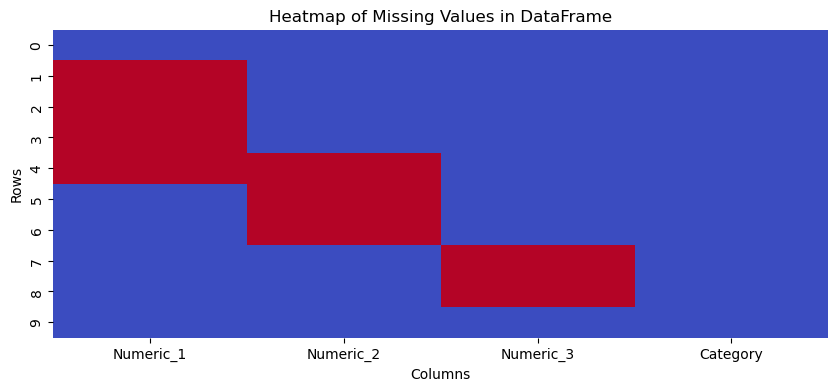

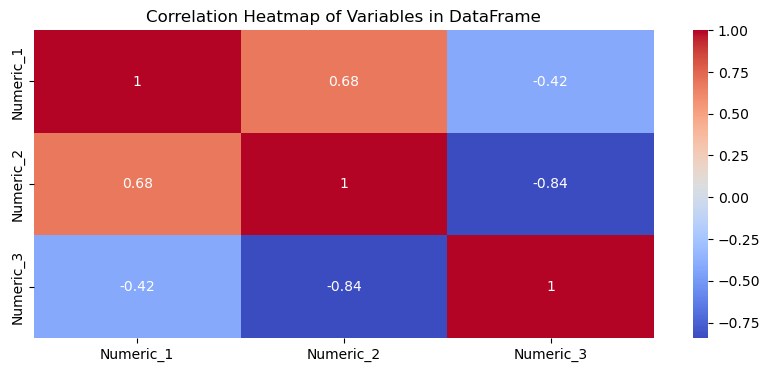

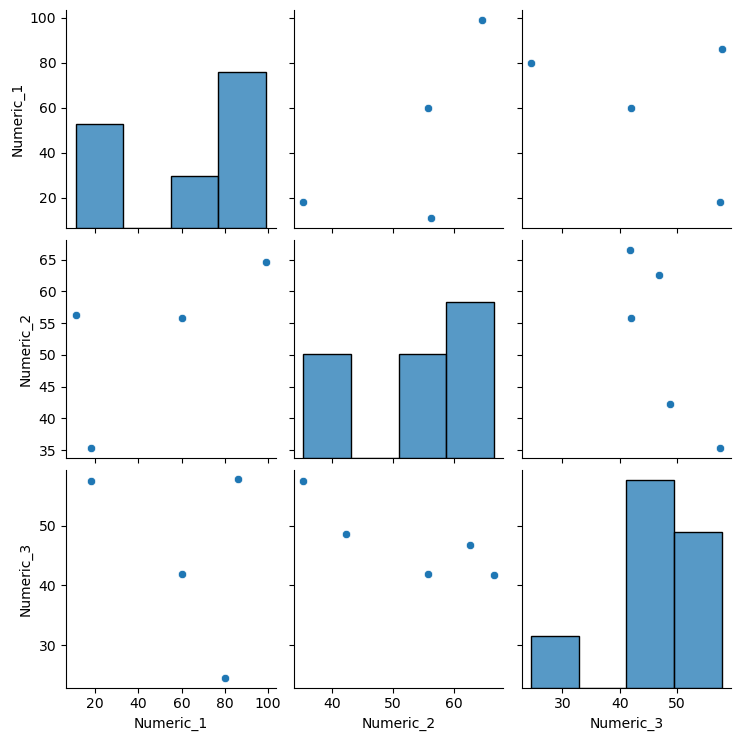

<Figure size 1000x400 with 0 Axes>

In [48]:
visualise(df)

## Detect outliers

In data analysis, outliers can either reveal critical insights or introduce annoying biases. The detect_outliers() function is an easy to use tool for detecting and categorizing outliers in Pandas Data Frames. This function uses the Interquartile Range (IQR) and standard deviation to identify and categorize its outliers. It then outputs the outliers to a Data Frame in a format that is simple to use and explore. By quickly identifying the most extreme outliers with our function, you can immediately get a sense of the scale of the problem the outliers might present. There are many real-world examples where disproportionate outliers make otherwise useful summary statistics unreliable. For example, detect_outliers() should be useful for real estate pricing. Data analysis on a real estate dataset can be compromised, when that dataset includes a few luxury homes priced significantly higher than the average. These extreme home values introduce a substantial skew, distorting the overall analysis. Our function enables you to swiftly identify and categorize these outliers. It also provides their index locations in the output Data Frame. Once you have the index of the outliers, all that's required is a few extra lines of code to remove these anomalous entries from your original dataset, ensuring a more balanced analysis!

#### Usage example

To give a simple demonstration on how the function is used, let's create a sample toy Data Frame (we can imagine the columns are features in the housing data set referenced above).

In [42]:
#generate a dataframe with two numerical columns, both having 2 outliers and one categorical column
df = pd.DataFrame({
    'House Price': [250, 300, 275, 320, 310, 290, 280, 265, 150, 225, 300, 250, 210, 2380, 2450],  # Prices in thousands, including outliers
    'Square Feet': [1500, 2000, 1800, 2100, 1900, 1600, 1700, 1750, 1500, 1700, 1800, 1450, 1300, 5400, 6800],  # Size in square feet
    'Location': ['Urban', 'Suburban', 'Rural', 'Urban', 'Suburban', 'Rural', 'Urban', 'Suburban', 'Urban', 'Urban', 'Rural', 'Urban', 'Suburban', 'Urban', 'Urban']  # Locations
})

Now that we have our dataframe with two extreme outliers, let's use the function to see what useful information we find on the outliers of our dataset.

In [43]:
result = detect_outliers(df)
print(result)

        column  index  outlier_value  deviation category
0  House Price      8            150     19.375     Mild
1  House Price     13           2380   2000.000  Extreme
2  House Price     14           2450   2070.000  Extreme
3  Square Feet     13           5400   2925.000   Severe
4  Square Feet     14           6800   4325.000  Extreme


The detect_outliers output returns the Data Frame shown above. A simple print function call will output the data in a clean, easy to read format.
The column name of the outlier, it's index, the value, it's deviation and a categorical description of how large the outlier is.
The outlier information can be used with pandas as needed to transform the original data frame.

For example, to remove the outliers from the original Data Frame using the output from our detect_outliers function you would.

In [44]:
# Find the 'extreme' outlier index locations
extreme_indices = result[result['category'] == 'Extreme']['index']

# Drop the rows from the main Data Frame that correspond to these indices
df_outlier_free = df.drop(extreme_indices)
print(df_outlier_free)

    House Price  Square Feet  Location
0           250         1500     Urban
1           300         2000  Suburban
2           275         1800     Rural
3           320         2100     Urban
4           310         1900  Suburban
5           290         1600     Rural
6           280         1700     Urban
7           265         1750  Suburban
8           150         1500     Urban
9           225         1700     Urban
10          300         1800     Rural
11          250         1450     Urban
12          210         1300  Suburban
